### Importing libraries

In [1]:
import numpy as np
import pandas as pd

### Importing dataset (from google drive)

In [2]:
dataset = pd.read_csv('a2_RestaurantReviews_FreshDump.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,Review
0,Spend your money elsewhere.
1,Their regular toasted bread was equally satisf...
2,The Buffet at Bellagio was far from what I ant...
3,"And the drinks are WEAK, people!"
4,-My order was not correct.


### Data cleaning
#### Remove stop words
##### Download NLTK stopwords resources

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ganiular/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
 
stop_words = set(stopwords.words('english'))
 
word_tokens = word_tokenize(example_sent)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
 
print(word_tokens)
print(filtered_sentence)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/ganiular/nltk_data'
    - '/home/ganiular/dev/miniconda3/nltk_data'
    - '/home/ganiular/dev/miniconda3/share/nltk_data'
    - '/home/ganiular/dev/miniconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [16]:
from nltk.corpus import stopwords

def stopwords_processing():
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    return all_stopwords

stopwords_processing()

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
s = '  heloo  hhh   '
s.split()

['heloo', 'hhh']

In [55]:
import re
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def data_cleaning():
  corpus=[]
  st_words=stopwords_processing()
  import re
  for i in dataset['Review']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = set(review)
    review = [ps.stem(word) for word in review if not word in set(st_words)]
    review = ' '.join(review)
    corpus.append(review)
  return corpus

data_cleaning()

['spend elsewher money',
 'bread pat satisfi mmmm toast butter equal regular occasion',
 'far bellagio buffet anticip',
 'peopl weak drink',
 'correct order not',
 'like feel bought made not also chip hous',
 'dessert went dinner elsewher disappoint',
 'amaz chip sal',
 'return',
 'vega new spot buffet fav',
 'like cannot owner run chicken cut employe unexperienc head believ serious mani around',
 'sad',
 'like insult judg human disrespect could talk anoth felt',
 'steakhous cook steak properli call understand',
 'concept food not impress',
 'thing like crazi ed guacamol pur',
 'noth hope postino experi realli better',
 'got food buffet poison',
 'yay warm someth think brought fri batch fresh',
 'fail trip eve christma dinner entir yummi biggest rememb hilari us',
 'back needless go soon say anytim',
 'place disgust',
 'eat degre teamwork time everi care see profession',
 'calamari joke ri style',
 'fondu edibl garlic howev much bare',
 'complain busi meal could lunch bare stomach',
 '

### Data transformation

In [48]:
# Loading BoW dictionary
from sklearn.feature_extraction.text import CountVectorizer
import pickle
cvFile='c1_BoW_Sentiment_Model.pkl'
# cv = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open('./drive/MyDrive/Colab Notebooks/2 Sentiment Analysis (Basic)/3.1 BoW_Sentiment Model.pkl', "rb")))
cv = pickle.load(open(cvFile, "rb"))


/home/ganiular/dev/miniconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [49]:
corpus_word=data_cleaning()
X_fresh = cv.transform(corpus_word).toarray()
X_fresh.shape

(100, 1420)

### Predictions (via sentiment classifier)

In [50]:
import joblib
classifier = joblib.load('Classifier_Sentiment_Model')


/home/ganiular/dev/miniconda3/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.4.0 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [51]:
y_pred = classifier.predict(X_fresh)
print(y_pred)

[0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [52]:
dataset['predicted_label'] = y_pred.tolist()
dataset.head()

,Review,predicted_label
0,Spend your money elsewhere.,0
1,Their regular toasted bread was equally satisf...,1
2,The Buffet at Bellagio was far from what I ant...,1
3,"And the drinks are WEAK, people!",0
4,-My order was not correct.,0


In [53]:
predictions=[]
for label in dataset['predicted_label']:
    if label ==0:
        predictions.append("Negative")
    else:
        predictions.append("Positive")


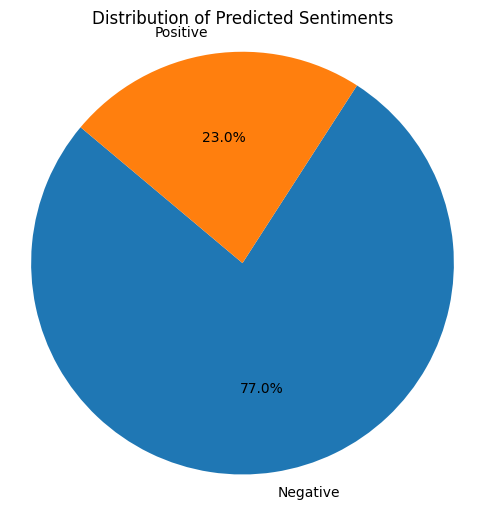

In [54]:
import matplotlib.pyplot as plt
from collections import Counter
label_counts = Counter(predictions)


labels = label_counts.keys()
sizes = label_counts.values()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Distribution of Predicted Sentiments')
plt.show()



In [16]:
dataset.to_csv("c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

### Most frequents words

In [58]:
corpus_word=data_cleaning()
words = ' '.join(corpus_word).split()
word_count = Counter(words)
word_count

Counter({'not': 14,
         'food': 13,
         'place': 13,
         'disappoint': 8,
         'like': 7,
         'back': 7,
         'go': 7,
         'time': 6,
         'eat': 5,
         'servic': 5,
         'would': 5,
         'buffet': 4,
         'realli': 4,
         'better': 4,
         'think': 4,
         'us': 4,
         'want': 4,
         'lack': 4,
         'pretti': 4,
         'next': 4,
         'also': 3,
         'impress': 3,
         'experi': 3,
         'say': 3,
         'much': 3,
         'bad': 3,
         'restaur': 3,
         'get': 3,
         'good': 3,
         'wait': 3,
         'dri': 3,
         'seem': 3,
         'flavor': 3,
         'bit': 3,
         'know': 3,
         'came': 3,
         'spend': 2,
         'elsewher': 2,
         'money': 2,
         'equal': 2,
         'drink': 2,
         'correct': 2,
         'order': 2,
         'feel': 2,
         'chip': 2,
         'dinner': 2,
         'return': 2,
         'insult': 2,
 

#### Top 10

In [59]:
word_count.most_common(10)

[('not', 14),
 ('food', 13),
 ('place', 13),
 ('disappoint', 8),
 ('like', 7),
 ('back', 7),
 ('go', 7),
 ('time', 6),
 ('eat', 5),
 ('servic', 5)]